# 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy.engine import create_engine
from scipy import stats
from numpy import random as nrandom

%config InlineBackend.figure_format = "retina"

## Integrando Estocásticamente

$$
    I = \int_0^1 \exp\left(-\frac{1}{2}x^2\right) dx = \sqrt{\frac{\pi}{2}} \text{erf}\left(\frac{1}{\sqrt{2}}\right)
$$

```
I ≈ 0.855624391
```

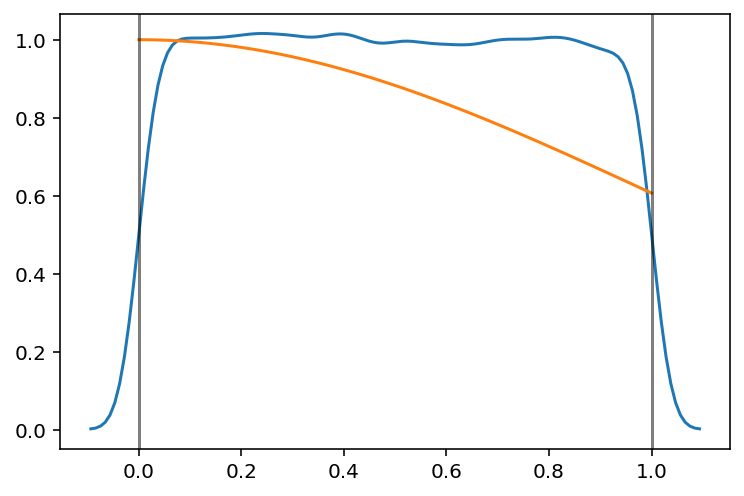

In [4]:
def h(x): return np.exp(-x ** 2 / 2)

xrange = np.linspace(0, 1, 100)
x = nrandom.uniform(low=0, high=1, size=90_000)
sns.kdeplot(x);
plt.plot(xrange, h(xrange))
plt.axvline(x=0, c="black", alpha=0.5)
plt.axvline(x=1, c="black", alpha=0.5)

In [5]:
h(x).mean()

0.856393397296099

<h2 style="color:crimson">Ejercicio</h2>

Calcula la siguiente integral
$$
    I = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^0 \exp\left(-\frac{1}{2}x^2\right) dx
$$

Considera:
$$
\begin{align}
    I &= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^z \exp\left(-\frac{1}{2}x^2\right) dx \\
      &= \int_\mathbb{R} \mathbb{1}_{x < z}(x) \cdot \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}x^2\right) dx \\
      &= \int_\mathbb{R} h(x) f(x) dx
\end{align}
$$

In [8]:
def h(x):
    return x<0

In [9]:
nobs = 200_000

x = np.random.normal(size=nobs)

In [11]:
h(x).mean()

0.49865

---

## Estimando Diferencias en probabilidades

In [6]:
from ipywidgets import interact, IntSlider

In [7]:
# desconocido
p1, p2 = 0.8, 0.2
# conocido
n, m = 10, 5
N = 10_000

@interact(obs=IntSlider(min=0, max=100, step=10, value=1))
def plot_posterior(obs):
    nrandom.seed(1643)
    X = nrandom.binomial(n, p1, size=obs)
    Y = nrandom.binomial(m, p2, size=obs)

    P1 = nrandom.beta(X.sum() + 1, n * obs - X.sum() + 1, size=N)
    P2 = nrandom.beta(Y.sum() + 1, m * obs - Y.sum() + 1, size=N)
    delta = P1 - P2
    
    p025 = np.quantile(delta, 0.025)
    p975 = np.quantile(delta, 0.975)
    
    sns.distplot(delta)
    title = f"95th interval = ({p025:0.2f}, {p975:0.2f})"
    title += f"\n mean = {delta.mean():0.3f}"
    plt.title(title, fontsize=13)

interactive(children=(IntSlider(value=1, description='obs', step=10), Output()), _dom_classes=('widget-interac…

## Referencias

1. https://en.wikipedia.org/wiki/Conjugate_prior
2. https://docs.pymc.io/Probability_Distributions.html
3. 